In [2]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 5.9 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [25]:
# Import tuning library

import joblib
import optuna
import matplotlib.pyplot as plt
from src.model import train_and_evaluate
from src.config import param_space

# load processed splits
X_train, y_train = joblib.load("data/processed/train.pkl")
X_val,   y_val   = joblib.load("data/processed/val.pkl")

print("Train:", X_train.shape, y_train.shape)
print("Val:  ", X_val.shape,   y_val.shape)

Train: (151075, 153) (151075,)
Val:   (21583, 153) (21583,)


In [49]:
# Load a small subset (or full) of preprocessed data

X_train, y_train = joblib.load("data/processed/train.pkl")
X_val,   y_val   = joblib.load("data/processed/val.pkl")

# Pick a fixed hyperparameter set
params = {
    "n_layers":   2,
    "units":      32,
    "lr":         1e-3,
    "batch_size": 64
}

# Run training once and print the RMSE
rmse = train_and_evaluate(params, X_train, y_train, X_val, y_val)
print(f"Manual run validation RMSE: {rmse:.4f}")

Manual run validation RMSE: 12929.8701


In [50]:
def objective(trial):
    params = {
      "n_layers":   trial.suggest_categorical("n_layers",   param_space["n_layers"]),
      "units":      trial.suggest_categorical("units",      param_space["units"]),
      "lr":         trial.suggest_float("lr",
                                        param_space["lr_min"],
                                        param_space["lr_max"],
                                        log=True),              # <- use suggest_float with log scale
      "batch_size": trial.suggest_categorical("batch_size", param_space["batch_sizes"]),
    }
    return train_and_evaluate(params, X_train, y_train, X_val, y_val)

In [53]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=5)

[I 2025-05-08 21:56:40,189] A new study created in memory with name: no-name-da76116d-7a93-4eaf-a9d2-a858f0ea7425
[I 2025-05-08 21:56:56,801] Trial 0 finished with value: 16201.69140625 and parameters: {'n_layers': 1, 'units': 32, 'lr': 0.0039304506148592384, 'batch_size': 64}. Best is trial 0 with value: 16201.69140625.
[I 2025-05-08 21:57:29,329] Trial 1 finished with value: 15916.4453125 and parameters: {'n_layers': 2, 'units': 32, 'lr': 0.00016480676144792165, 'batch_size': 32}. Best is trial 1 with value: 15916.4453125.
[I 2025-05-08 21:58:57,415] Trial 2 finished with value: 10955.841796875 and parameters: {'n_layers': 3, 'units': 128, 'lr': 0.00010518457680130887, 'batch_size': 16}. Best is trial 2 with value: 10955.841796875.
[I 2025-05-08 21:59:54,345] Trial 3 finished with value: 12157.9091796875 and parameters: {'n_layers': 1, 'units': 16, 'lr': 0.009192529105503815, 'batch_size': 16}. Best is trial 2 with value: 10955.841796875.
[I 2025-05-08 22:00:27,719] Trial 4 finished 

In [57]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=10)

[I 2025-05-08 22:11:24,514] A new study created in memory with name: no-name-5563d859-4144-4ef6-a1d7-16495d769e5c
[I 2025-05-08 22:11:58,866] Trial 0 finished with value: 19647.6953125 and parameters: {'n_layers': 1, 'units': 128, 'lr': 0.0003014613187878014, 'batch_size': 32}. Best is trial 0 with value: 19647.6953125.
[I 2025-05-08 22:12:50,289] Trial 1 finished with value: 7969.9267578125 and parameters: {'n_layers': 3, 'units': 128, 'lr': 0.008089515352602378, 'batch_size': 32}. Best is trial 1 with value: 7969.9267578125.
[I 2025-05-08 22:13:23,561] Trial 2 finished with value: 15138.8076171875 and parameters: {'n_layers': 1, 'units': 128, 'lr': 0.0037804091625314243, 'batch_size': 32}. Best is trial 1 with value: 7969.9267578125.
[I 2025-05-08 22:13:57,747] Trial 3 finished with value: 13800.8193359375 and parameters: {'n_layers': 2, 'units': 64, 'lr': 0.00025021500946804655, 'batch_size': 32}. Best is trial 1 with value: 7969.9267578125.
[I 2025-05-08 22:14:31,073] Trial 4 finis

In [59]:
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=15)

[I 2025-05-08 22:41:56,339] A new study created in memory with name: no-name-8e48f791-c510-47fc-a2ca-e73aec3890a9
[I 2025-05-08 22:42:16,292] Trial 0 finished with value: 22494.662109375 and parameters: {'n_layers': 1, 'units': 128, 'lr': 0.0001590487447238571, 'batch_size': 64}. Best is trial 0 with value: 22494.662109375.
[I 2025-05-08 22:43:15,797] Trial 1 finished with value: 18250.306640625 and parameters: {'n_layers': 1, 'units': 32, 'lr': 0.0007473245778167559, 'batch_size': 16}. Best is trial 1 with value: 18250.306640625.
[I 2025-05-08 22:44:01,358] Trial 2 finished with value: 9749.7080078125 and parameters: {'n_layers': 2, 'units': 128, 'lr': 0.0007969302934440885, 'batch_size': 32}. Best is trial 2 with value: 9749.7080078125.
[I 2025-05-08 22:44:25,209] Trial 3 finished with value: 7878.111328125 and parameters: {'n_layers': 3, 'units': 64, 'lr': 0.005516427485359596, 'batch_size': 64}. Best is trial 3 with value: 7878.111328125.
[I 2025-05-08 22:45:36,800] Trial 4 finishe

Best params: {'n_layers': 3, 'units': 16, 'lr': 0.008946064648152691, 'batch_size': 64}
Best RMSE:   7315.7412109375


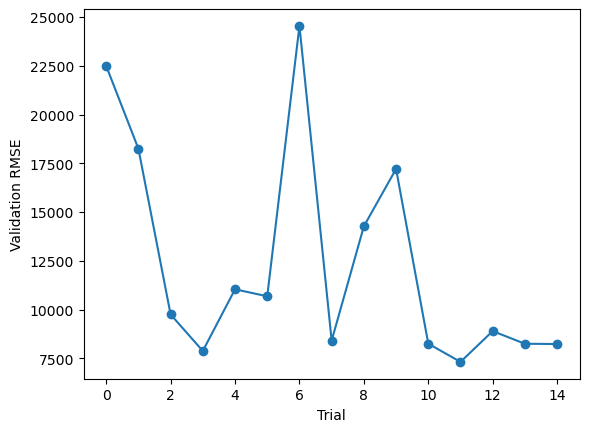

In [61]:
print("Best params:", study.best_params)
print("Best RMSE:  ", study.best_value)

# plot RMSE over trials
plt.plot([t.value for t in study.trials], marker="o")
plt.xlabel("Trial"); plt.ylabel("Validation RMSE")
plt.show()

In [63]:
joblib.dump(study, "data/processed/optuna_study.pkl")

['data/processed/optuna_study.pkl']